In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv('NBA_DATA/all_seasons.csv')

height = np.array(data['player_height'])
print(height)


[193.04 190.5  203.2  ... 205.74 208.28 205.74]
Mean height:        200.555096543133
Standard deviation: 9.110735524904456
Minimum height:     160.02
Maximum height:     231.14


In [8]:
print('Mean height:       ', height.mean())
print("Standard deviation:", height.std())
print("Minimum height:    ", height.min())
print("Maximum height:    ", height.max())

Mean height:        200.555096543133
Standard deviation: 9.110735524904456
Minimum height:     160.02
Maximum height:     231.14


In [9]:
print('25th percentil:      ', np.percentile(height,25))
print('Median:              ', np.median(height))
print('75th percentile:     ', np.percentile(height,75))

25th percentil:       193.04
Median:               200.66
75th percentile:      208.28


Text(0, 0.5, 'Number')

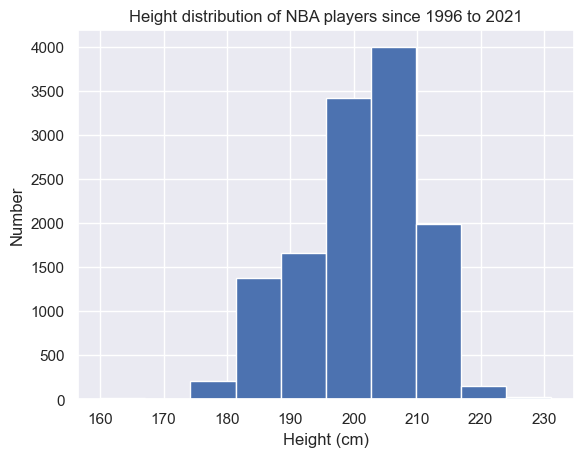

In [12]:
import matplotlib.pyplot as plt
import seaborn ; seaborn.set()  #this set plot style

plt.hist(height)
plt.title('Height distribution of NBA players since 1996 to 2021')
plt.xlabel('Height (cm)')
plt.ylabel('Number')

